## Imports / Load Data

In [7]:
import pandas as pd
import numpy as np
import pickle

In [5]:
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.base import BaseEstimator
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import joblib
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('../data/raw/data_2020_05.csv', parse_dates=['ts'])

In [9]:
df.head()

,in_room,rr,hr,ts,user_id
0,False,0.0,93.546196,2019-03-20 03:00:00,1
1,False,0.0,-1.000000,2019-03-20 03:01:00,1
2,False,0.0,-1.000000,2019-03-20 03:02:00,1
3,False,0.0,98.374496,2019-03-20 03:03:00,1
4,False,0.0,94.692595,2019-03-20 03:04:00,1


## Model

In [14]:
min_hr = 1  # Values below this ignored
min_rr = 3  # Values below this ignored
user = 1
X = df[(df.in_room == True) & (df.user_id == user) & (df.hr > min_hr) & (df.rr > min_rr)][['hr', 'rr']]

In [147]:
# save last 20% for testing
X_tr, X_va = train_test_split(X, test_size=0.2, shuffle=False)

In [148]:
scaler = StandardScaler()
X_tr_scaled = scaler.fit_transform(X_tr)
X_va_scaled = scaler.transform(X_va)

In [149]:
el = EllipticEnvelope(contamination=0.12)
isf = IsolationForest(contamination='auto')

In [150]:
# Fit both models
el.fit(X_tr_scaled)
isf.fit(X_tr_scaled)

IsolationForest(behaviour='deprecated', bootstrap=False, contamination='auto',
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

In [151]:
test = scale.transform(np.array([70.01, 15.3079236402]).reshape(1,-1))
print(el.predict(test))

[1]


In [152]:
# Make predictions
preds_el = el.predict(X_va_scaled)
preds_isf = isf.predict(X_va_scaled)
# Get outliers
outl_el = X_va[preds_el == -1]
outl_isf = X_va[preds_isf == -1]

In [153]:
xx, yy = np.meshgrid(np.linspace(20, 90, 150),
                     np.linspace(5, 30, 150))

In [154]:
def get_decision_boundary(algorithm: BaseEstimator, xx: np.array, yy: np.array, scaler: BaseEstimator = None) -> np.array:
    """Get the decision boundary for the outliers."""
    mat = np.c_[xx.ravel(), yy.ravel()]
    if scaler:
        mat = scaler.transform(mat)
    Z = algorithm.predict(mat)
    Z = Z.reshape(xx.shape)
    return Z

Text(0, 0.5, 'rr')

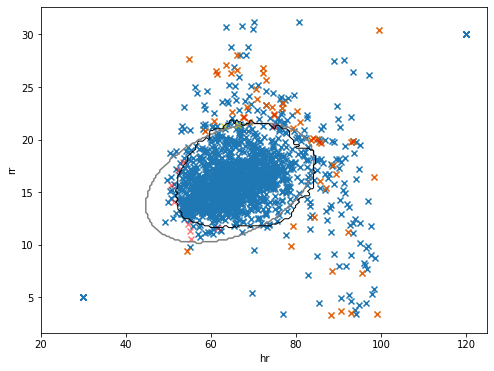

In [156]:
fig = plt.figure(figsize=(8,6))
plt.scatter(X_tr.iloc[:,0],X_tr.iloc[:,1],marker="x",cmap='viridis');
# plt.scatter(outl.iloc[:,0],outl.iloc[:,1],marker="x",cmap='viridis');
plt.scatter(outl_el.iloc[:,0],outl_el.iloc[:,1],marker="x", c='y', alpha=0.8);
plt.scatter(outl_isf.iloc[:,0],outl_isf.iloc[:,1],marker="x",c='r', cmap='viridis', alpha=0.5);
Z_el = get_decision_boundary(el, xx, yy, scaler)
plt.contour(xx, yy, Z_el, levels=0, linewidths=1.5, colors='gray', );
Z_isf = get_decision_boundary(isf, xx, yy, scaler)
plt.contour(xx, yy, Z_isf, levels=0, linewidths=1, colors='black', );
ax = fig.gca()
ax.set_xlabel('hr')
ax.set_ylabel('rr')

In [157]:
joblib.dump(el, '../data/models/model_el.pkl')
joblib.dump(scaler, '../data/models/scaler.pkl')

['../data/models/scaler.pkl']